<a href="https://colab.research.google.com/github/josegarciav/MMA-Thesis/blob/main/LBFGS_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Probar diferentes modelos

In [ ]:
!git clone https://github.com/josegarciav/MMA-Thesis #clonar repositorio de la tesis

Cloning into 'MMA-Thesis'...
remote: Enumerating objects: 102, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 102 (delta 8), reused 0 (delta 0), pack-reused 78
Receiving objects: 100% (102/102), 4.19 MiB | 16.81 MiB/s, done.
Resolving deltas: 100% (34/34), done.


In [ ]:
#Cambiar el directorio al folder del git clone
!pwd
import os
os.chdir('/content/MMA-Thesis')
!pwd

/content/MMA-Thesis
/content/MMA-Thesis


In [ ]:
#!pip install tf-nightly
!pip install tensorflow #==1.15.00  #Cambiar la version de tensorflow actual

In [ ]:
import os
os.environ.get("tf_upgrade_v2") #para migrar el codigo legacy de tensorflow 1.15.0 al de tensorflow 2.0

Nota: Crear una carpeta llamada `results` en el directorio actual donde se puedan guardar los resultados:

In [ ]:
!mkdir results #crear carpeta dentro del directorio actual

mkdir: cannot create directory ‘results’: File exists


In [ ]:
#!tf_upgrade_v2 --infile LBFGS_TR.py --outfile LBFGS_TR.py --reportfile reportfileconversion
#Esto ya no es necesario hacerlo ya que se actualizo manualmente el archivo en el repositorio de github

In [ ]:
!python LBFGS_TR.py -m=25 -minibatch=5 -num-batch=50 -method='trust-region' -maxiter=100 #ojo resetear default
# Correr el modelo convolucional en MNIST con L-BFGS --4 -:> 50

In [ ]:
!python LBFGS_TR.py -m=25 -minibatch=50 -num-batch=50 -method='trust-region' -maxiter=100

In [ ]:
!python LBFGS_TR.py -m=25 -minibatch=100 -num-batch=50 -method='trust-region' -maxiter=100

In [ ]:
!python LBFGS_TR.py -m=25 -minibatch=500 -num-batch=50 -method='trust-region' -maxiter=100

In [ ]:
!python LBFGS_TR.py -m=25 -minibatch=1000 -num-batch=50 -method='trust-region' -maxiter=100

In [ ]:
# Experimentos sobre el tamano del lote bs = 1000 (usado en el primer experimento)
import pickle
DATA_PATH = "/content/MMA-Thesis/results/results_experiment_FEB_23_trust-region_m_25_n_50_minibatch_1000.pkl"
infile = open(DATA_PATH, 'rb')
# best_model1 = pickle.load(infile) #Modelo L-BFGS bajo la estrategia de region de confianza con bs=5
# best_model2 = pickle.load(infile) #Modelo L-BFGS bajo la estrategia de region de confianza con bs=50
# best_model3 = pickle.load(infile) #Modelo L-BFGS bajo la estrategia de region de confianza con bs=100
# best_model4 = pickle.load(infile) #Modelo L-BFGS bajo la estrategia de region de confianza con bs=500
best_model5 = pickle.load(infile) #Modelo L-BFGS bajo la estrategia de region de confianza con bs=1000

In [ ]:
#Experimentos sobre el numero de lotes en superposicion nlsp = 50
# import pickle
# DATA_PATH = "/content/MMA-Thesis/results/results_experiment_FEB_23_trust-region_m_25_n_100.pkl"
# infile = open(DATA_PATH,'rb')
# best_model1 = pickle.load(infile) #Modelo L-BFGS bajo la estrategia de region de confianza con nlsp=5
# best_model2 = pickle.load(infile) #Modelo L-BFGS bajo la estrategia de region de confianza con nlsp=10
# best_model3 = pickle.load(infile) #Modelo L-BFGS bajo la estrategia de region de confianza con nlsp=20
# best_model4 = pickle.load(infile) #Modelo L-BFGS bajo la estrategia de region de confianza con nlsp=50
# best_model5 = pickle.load(infile) #Modelo L-BFGS bajo la estrategia de region de confianza con nlsp=100

In [ ]:
#Experimentos sobre variante de memoria limitada m = 25
#import pickle
#DATA_PATH = "/content/MMA-Thesis/results/results_experiment_FEB_23_trust-region_m_1000_n_50.pkl"
#infile = open(DATA_PATH,'rb')
#best_model1 = pickle.load(infile) #Modelo L-BFGS bajo la estrategia de region de confianza con m=5
#best_model2 = pickle.load(infile) #Modelo L-BFGS bajo la estrategia de region de confianza con m=10
#best_model3 = pickle.load(infile) #Modelo L-BFGS bajo la estrategia de region de confianza con m=25
#best_model4 = pickle.load(infile) #Modelo L-BFGS bajo la estrategia de region de confianza con m=100
#best_model5 = pickle.load(infile) #Modelo L-BFGS bajo la estrategia de region de confianza con m=1000

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 18})
plt.rc('font', family='serif')
plt.style.use('seaborn-muted')

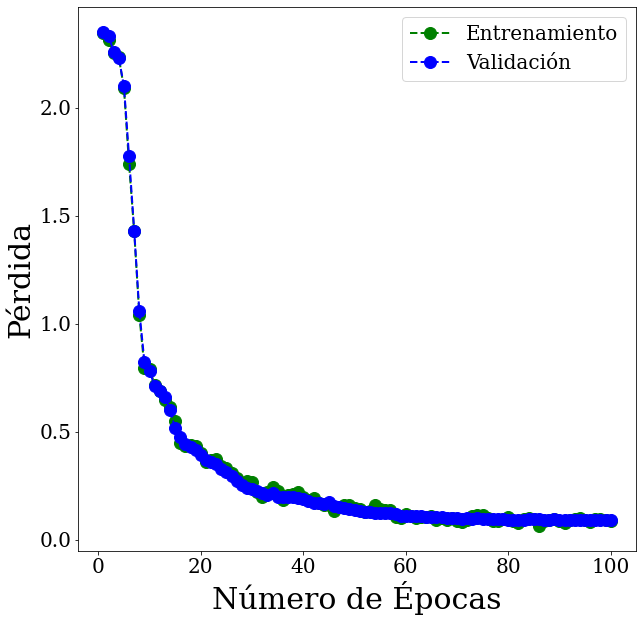

In [ ]:
'''
    Mostrar resultados para L-BFGS
    -- m=25 (parametro de la memoria del hessiano)
    -- Estrategia de Busqueda de Linea
    -- minibatch size = 1000
    -- Numero de batches = 50
    -- Usar toda la data para computar los gradientes = True (OJO CAMBIAR CODIGO FUENTE = FALSE)
'''

maxiter=100 # Maximo numero de iteraciones establecido anteriormente

plt.subplots(figsize = (10, 10))
plt.plot(np.linspace(1, maxiter, len(best_model1[0])), best_model1[0],
         color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.plot(np.linspace(1, maxiter, len(best_model1[1])), best_model1[1],
         color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=12)
#plt.plot(np.linspace(1, maxiter, len(best_model1[2])), best_model1[2],
#         color='red', marker='o', linestyle='dashed', linewidth=2, markersize=12)

plt.yscale("linear")
#plt.title('Pérdida L-BFGS', fontsize=35)
plt.ylabel('Pérdida', fontsize=30)
plt.xlabel('Número de Épocas', fontsize=30)
plt.legend(['Entrenamiento', 'Validación'], loc='upper right', fontsize=20) # , 'Prueba'
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)

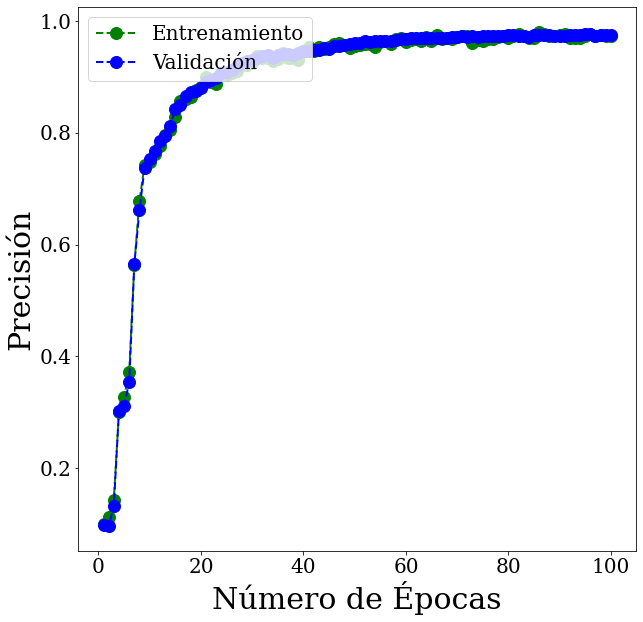

In [ ]:
plt.subplots(figsize = (10,10))
plt.plot(np.linspace(1, maxiter, len(best_model1[3])), best_model1[3],
         color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.plot(np.linspace(1, maxiter, len(best_model1[4])), best_model1[4],
         color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=12)
#plt.plot(np.linspace(1, maxiter, len(best_model1[5])), best_model1[5],
#         color='red', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.yscale("linear")
#plt.title('Precisión L-BFGS', fontsize=35)
plt.ylabel('Precisión', fontsize=30)
plt.xlabel('Número de Épocas', fontsize=30)
plt.legend(['Entrenamiento', 'Validación'], loc='upper left', fontsize=20) # , 'Prueba'
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)

## Experimentos adicionales

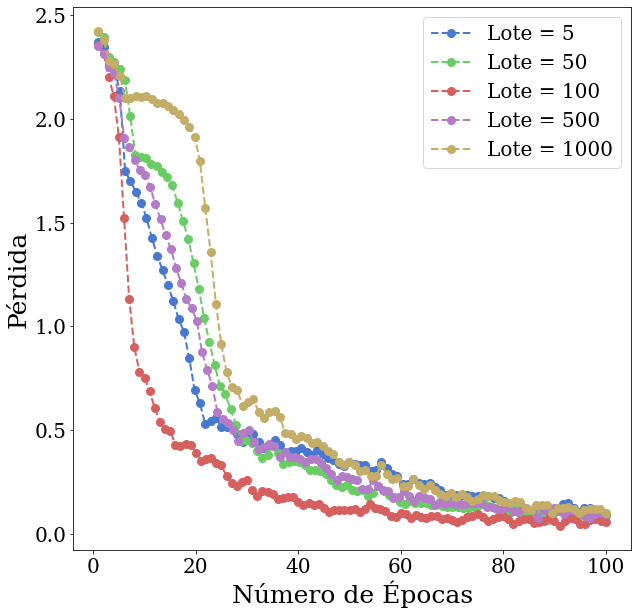

In [ ]:
maxiter=100 # Maximo numero de iteraciones establecido anteriormente

plt.subplots(figsize = (10, 10))
plt.plot(np.linspace(1, maxiter, len(best_model1[0])), best_model1[0],
         marker='o', linestyle='dashed', linewidth=2, markersize=8)
# plt.plot(np.linspace(1, maxiter, len(best_model1[1])), best_model1[1],
#          marker='o', linestyle='dashed', linewidth=2)
plt.plot(np.linspace(1, maxiter, len(best_model2[0])), best_model2[0],
         marker='o', linestyle='dashed', linewidth=2, markersize=8)
# plt.plot(np.linspace(1, maxiter, len(best_model2[1])), best_model2[1],
#          marker='o', linestyle='dashed', linewidth=2)
plt.plot(np.linspace(1, maxiter, len(best_model3[0])), best_model3[0],
         marker='o', linestyle='dashed', linewidth=2, markersize=8)
# plt.plot(np.linspace(1, maxiter, len(best_model3[1])), best_model3[1],
#          marker='o', linestyle='dashed', linewidth=2)
plt.plot(np.linspace(1, maxiter, len(best_model4[0])), best_model4[0],
         marker='o', linestyle='dashed', linewidth=2, markersize=8)
# plt.plot(np.linspace(1, maxiter, len(best_model4[1])), best_model4[1],
#          marker='o', linestyle='dashed', linewidth=2)
plt.plot(np.linspace(1, maxiter, len(best_model5[0])), best_model5[0],
         marker='o', linestyle='dashed', linewidth=2, markersize=8)
# plt.plot(np.linspace(1, maxiter, len(best_model5[1])), best_model5[1],
#          marker='o', linestyle='dashed', linewidth=2)

plt.yscale("linear")
#plt.title('Memoria limitada L-BFGS', fontsize=35)
plt.ylabel('Pérdida', fontsize=25)
plt.xlabel('Número de Épocas', fontsize=25)
plt.legend(['Lote = 5', 'Lote = 50', 'Lote = 100', 'Lote = 500', 'Lote = 1000'], loc='upper right', fontsize=20) #, 'Prueba'
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)

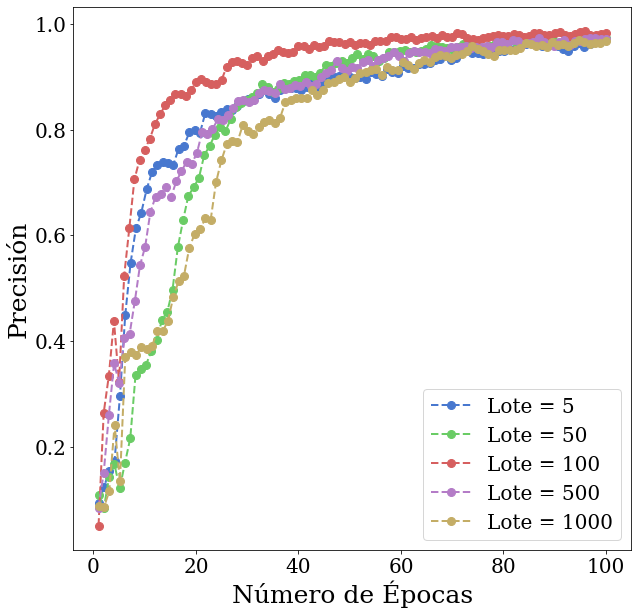

In [ ]:
maxiter=100 # Maximo numero de iteraciones establecido anteriormente

plt.subplots(figsize = (10, 10))
plt.plot(np.linspace(1, maxiter, len(best_model1[3])), best_model1[3],
         marker='o', linestyle='dashed', linewidth=2, markersize=8)
# plt.plot(np.linspace(1, maxiter, len(best_model1[4])), best_model1[4],
#          marker='o', linestyle='dashed', linewidth=2)
plt.plot(np.linspace(1, maxiter, len(best_model2[3])), best_model2[3],
         marker='o', linestyle='dashed', linewidth=2, markersize=8)
# plt.plot(np.linspace(1, maxiter, len(best_model2[4])), best_model2[4],
#          marker='o', linestyle='dashed', linewidth=2)
plt.plot(np.linspace(1, maxiter, len(best_model3[3])), best_model3[3],
         marker='o', linestyle='dashed', linewidth=2, markersize=8)
# plt.plot(np.linspace(1, maxiter, len(best_model3[4])), best_model3[4],
#          marker='o', linestyle='dashed', linewidth=2)
plt.plot(np.linspace(1, maxiter, len(best_model4[3])), best_model4[3],
         marker='o', linestyle='dashed', linewidth=2, markersize=8)
# plt.plot(np.linspace(1, maxiter, len(best_model4[4])), best_model4[4],
#          marker='o', linestyle='dashed', linewidth=2)
plt.plot(np.linspace(1, maxiter, len(best_model5[3])), best_model5[3],
         marker='o', linestyle='dashed', linewidth=2, markersize=8)
# plt.plot(np.linspace(1, maxiter, len(best_model5[4])), best_model5[4],
#          marker='o', linestyle='dashed', linewidth=2)

plt.yscale("linear")
# plt.title('Memoria limitada L-BFGS', fontsize=35)
plt.ylabel('Precisión', fontsize=25)
plt.xlabel('Número de Épocas', fontsize=25)
plt.legend(['Lote = 5', 'Lote = 50', 'Lote = 100', 'Lote = 500', 'Lote = 1000'], loc='lower right', fontsize=20) #, 'Prueba'
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)